#Data Handling

In [126]:
import pandas as pd

In [127]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [128]:
train_data.shape

(750000, 18)

In [129]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [130]:
train_data.pdays.unique()

array([ -1, 175,  91, 181, 252,  90, 211, 183,  87, 168, 172, 364, 266,
       122,  94, 196, 324,  92, 348,  97, 173, 190, 271, 374, 185, 366,
       339, 204, 399, 340,  88, 154,  24, 188, 370, 150, 365, 101, 133,
       355,  83,  99, 247, 259, 350, 189,  95, 180, 367, 371, 265, 151,
       363,  85,  86, 347, 131, 184, 344, 459, 352, 360,  96, 104, 334,
       186, 135, 362,  40, 280, 361, 178, 202, 244, 776, 109, 351, 293,
       182, 192, 353, 356, 187, 369, 191, 170, 255, 317, 174, 321, 169,
       177, 105, 315, 176, 346, 132, 330, 287,  70, 368, 381, 478, 262,
       342, 157, 254, 331, 171, 149, 153,  89, 234, 107,   8,  93, 322,
       253, 103, 245, 251, 127, 336, 357, 258, 226, 197, 140, 250, 354,
       102, 299, 193, 337, 111, 179, 343,   2, 286, 205, 264, 267, 302,
       142, 148, 325,  81, 461, 195, 274, 308, 508, 345, 440, 586, 358,
       222, 332, 314, 200, 263, 272, 305, 289, 298,  98, 238, 294, 160,
       273, 359, 113, 511, 165, 288, 120, 115,   9, 301,   1, 15

In [131]:
train_data.isnull().sum()

,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [132]:
obj_cols = train_data.select_dtypes(include='object').columns
for cols in obj_cols:
    print(cols)
    print(train_data[cols].unique())
    print("-"*50)

job
['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']
--------------------------------------------------
marital
['married' 'single' 'divorced']
--------------------------------------------------
education
['secondary' 'primary' 'tertiary' 'unknown']
--------------------------------------------------
default
['no' 'yes']
--------------------------------------------------
housing
['no' 'yes']
--------------------------------------------------
loan
['no' 'yes']
--------------------------------------------------
contact
['cellular' 'unknown' 'telephone']
--------------------------------------------------
month
['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']
--------------------------------------------------
poutcome
['unknown' 'other' 'failure' 'success']
--------------------------------------------------


In [133]:
train_data['poutcome'].value_counts()

,count
poutcome,
unknown,672450
failure,45115
success,17691
other,14744


In [134]:
train_data = train_data.replace({'poutcome': {'other':'unknown'}})
train_data.poutcome.value_counts()

,count
poutcome,
unknown,687194
failure,45115
success,17691


In [135]:
train_data['job'].value_counts()

,count
job,
management,175541
blue-collar,170498
technician,138107
admin.,81492
services,64209
retired,35185
self-employed,19020
entrepreneur,17718
unemployed,17634


In [136]:
train_data = train_data.replace({'job': {'unknown':'unemployed'}})

In [137]:
train_data.job.value_counts()

,count
job,
management,175541
blue-collar,170498
technician,138107
admin.,81492
services,64209
retired,35185
unemployed,20551
self-employed,19020
entrepreneur,17718


#EDA : Exploratory Data Analysis

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
sns.set_theme(palette='pastel')

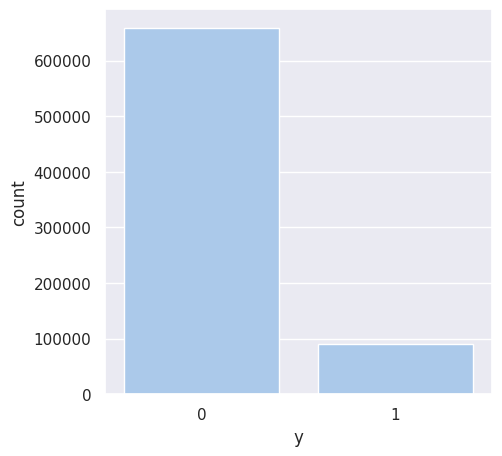

In [140]:
plot = plt.figure(figsize=(5,5))
sns.countplot(x='y', data=train_data)
plot.show()

In [141]:
train_data.y.value_counts()

,count
y,
0,659512
1,90488


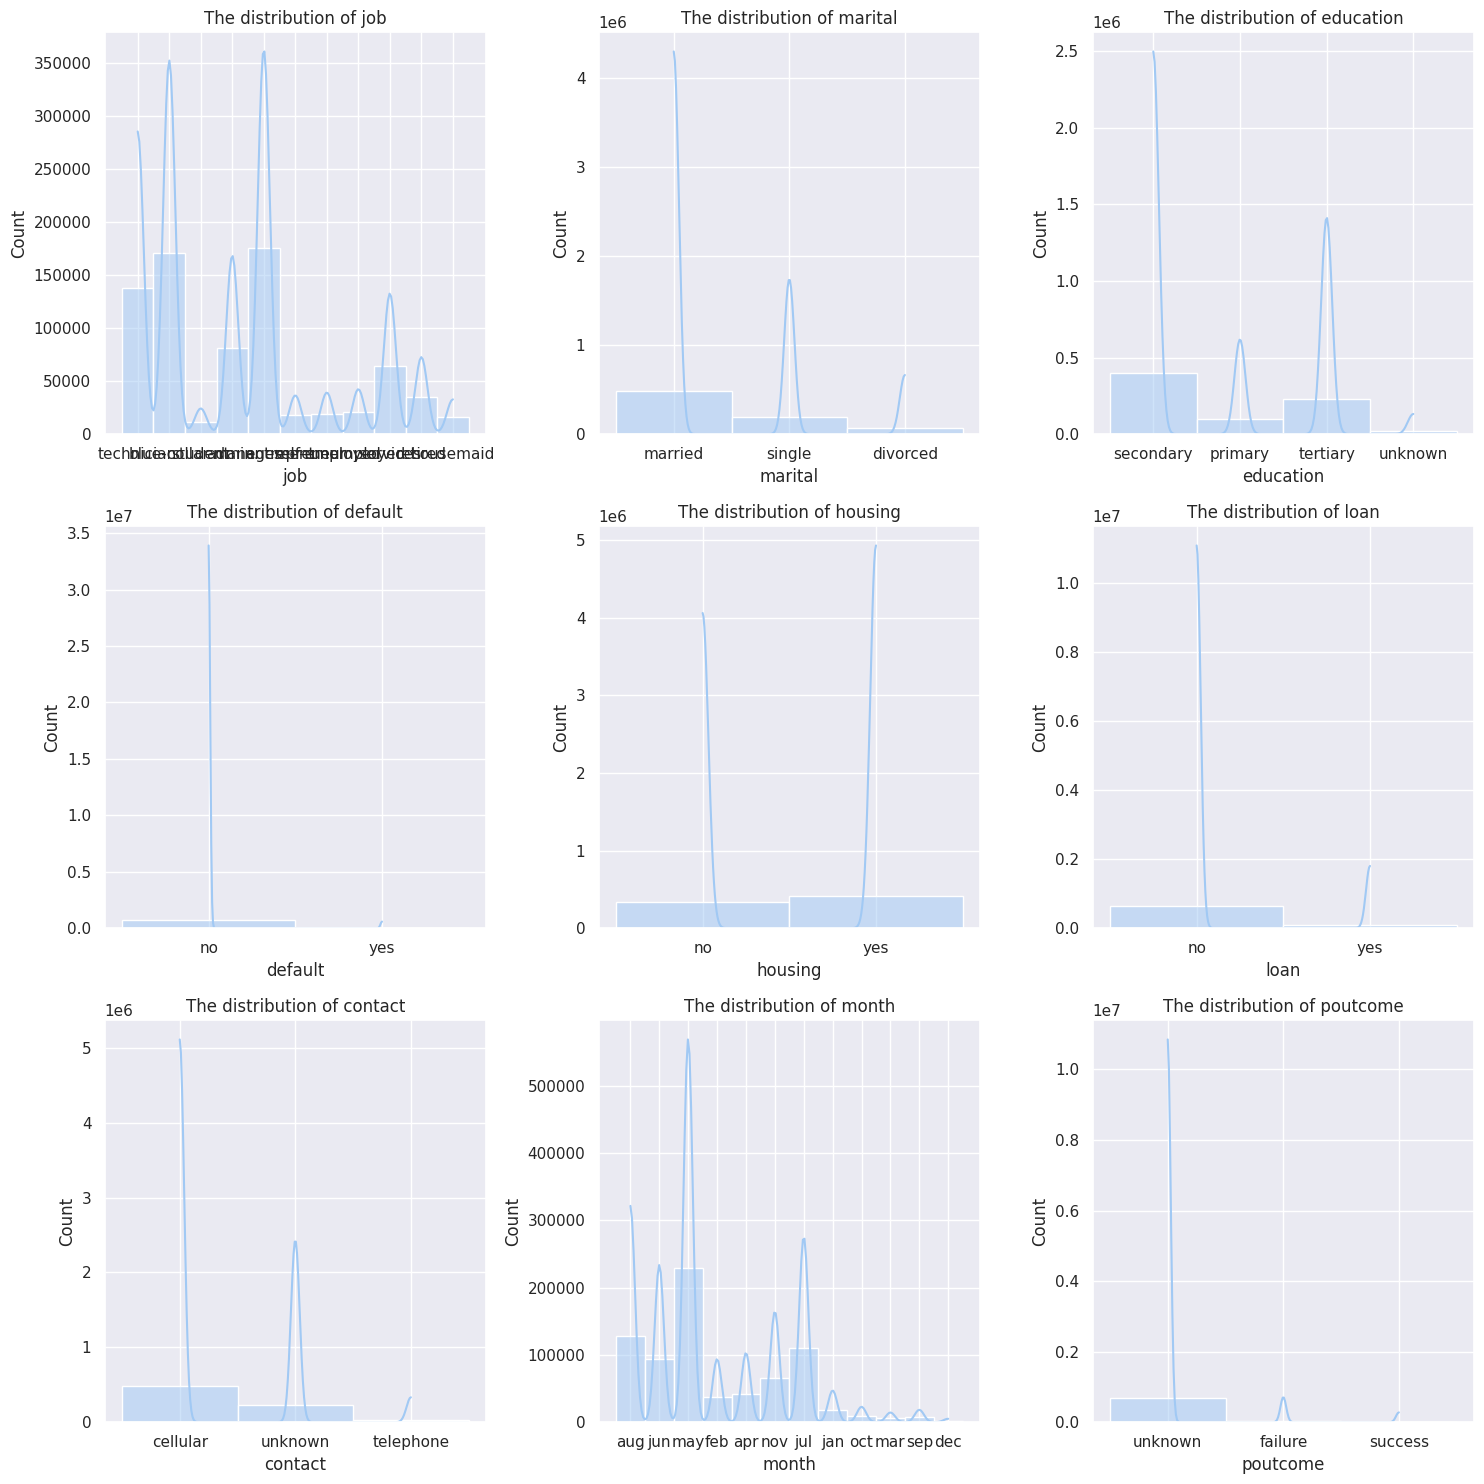

In [142]:
plot = plt.figure(figsize=(15,15))
for i, cols in enumerate (obj_cols, 1):
    plot.add_subplot(3, 3, i)
    sns.histplot(train_data[cols], kde=True)
    plt.title(f'The distribution of {cols}')
plt.tight_layout()
plt.show()

#Label Encoder

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
encoders = {}
for col in obj_cols:
  le = LabelEncoder()
  train_data[col] = le.fit_transform(train_data[col])
  encoders[col] = le

In [145]:
import pickle as pkl

In [146]:
with open('encoders.pkl', 'wb') as f:
  pkl.dump(encoders, f)

In [147]:
train_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,9,1,1,0,7,0,0,0,25,1,117,3,-1,0,2,0
1,1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,2,0
2,2,36,1,1,1,0,602,1,0,2,14,8,111,2,-1,0,2,0
3,3,27,8,2,1,0,34,1,0,2,28,8,10,2,-1,0,2,0
4,4,26,9,1,1,0,889,1,0,0,3,3,902,1,-1,0,2,1


In [148]:
for cols in obj_cols:
    print(cols)
    print(train_data[cols].unique())
    print("-"*50)

job
[ 9  1  8  0  4  2  6 10  7  5  3]
--------------------------------------------------
marital
[1 2 0]
--------------------------------------------------
education
[1 0 2 3]
--------------------------------------------------
default
[0 1]
--------------------------------------------------
housing
[0 1]
--------------------------------------------------
loan
[0 1]
--------------------------------------------------
contact
[0 2 1]
--------------------------------------------------
month
[ 1  6  8  3  0  9  5  4 10  7 11  2]
--------------------------------------------------
poutcome
[2 0 1]
--------------------------------------------------


#Resampling 'Y' values

In [149]:
train_data.y.value_counts()

,count
y,
0,659512
1,90488


In [150]:
majority_class = train_data[train_data['y'] == 0]
minority_class = train_data[train_data['y'] == 1]

In [151]:
from sklearn.utils import resample
majority_sample = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

In [152]:
print(majority_sample.shape, minority_class.shape)

(90488, 18) (90488, 18)


In [153]:
train_data_sample = pd.concat([majority_sample, minority_class])

In [154]:
train_data_sample.y.value_counts()

,count
y,
0,90488
1,90488


In [155]:
train_data_sample.shape

(180976, 18)

#Correlation Matrix

In [156]:
correlation_matrix = train_data_sample.corr()

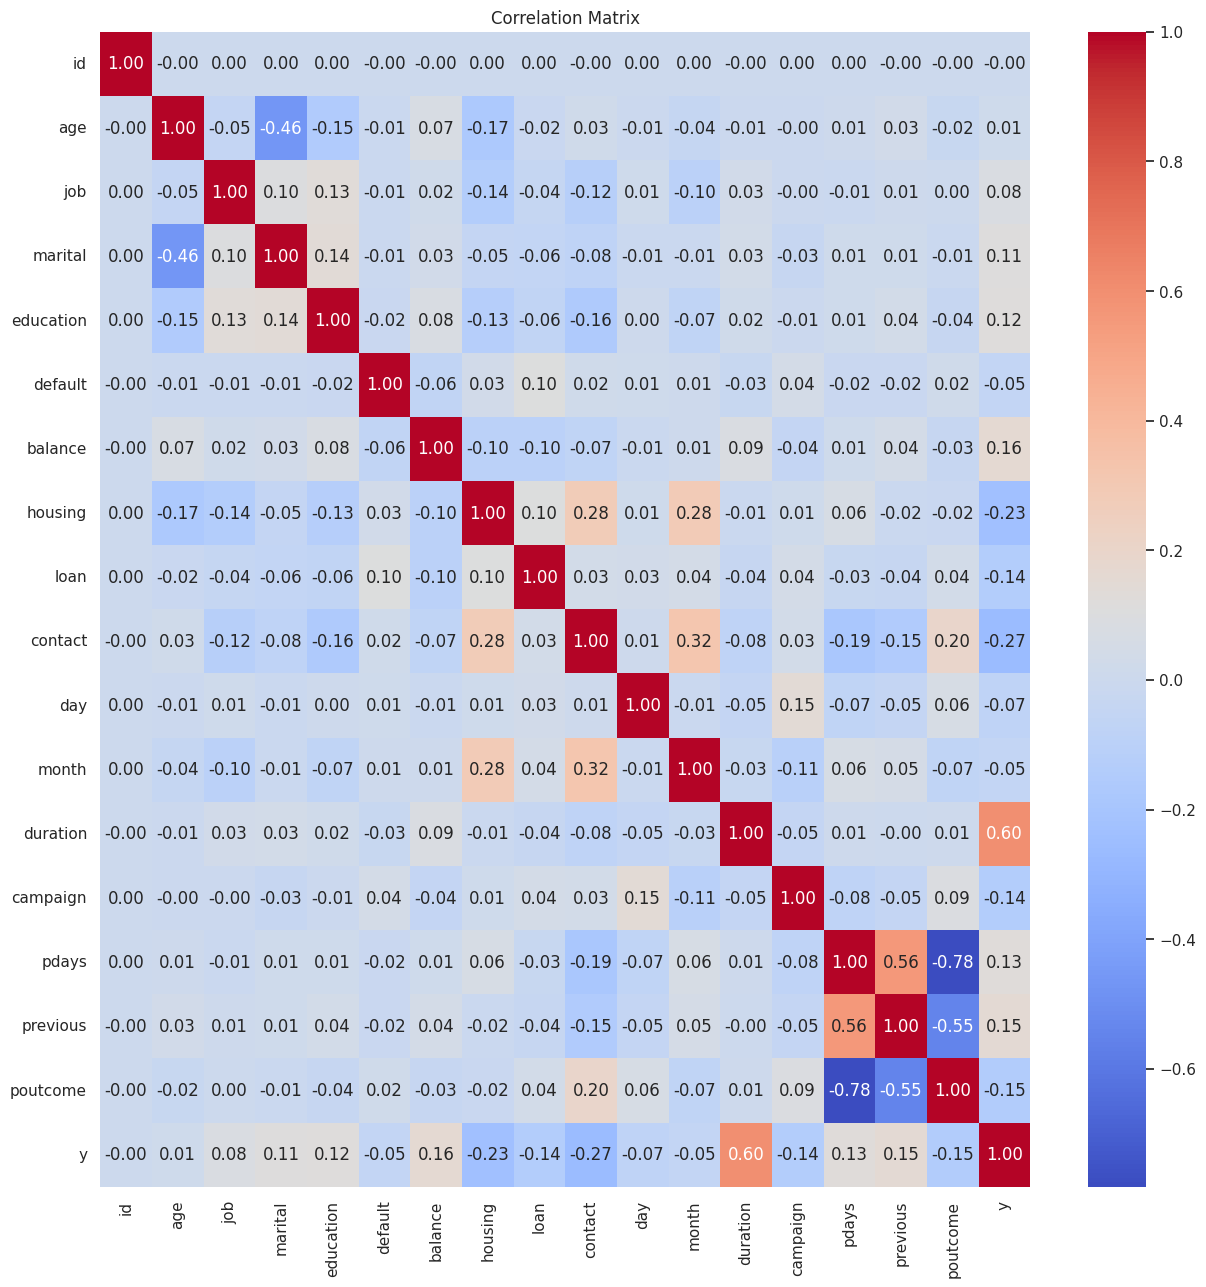

In [157]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Train Test Split

In [158]:
x = train_data_sample.drop(['id', 'y'], axis=1)
y = train_data_sample['y']

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [161]:
print(x.shape, x_train.shape, x_test.shape)

(180976, 16) (126683, 16) (54293, 16)


#Models:
##Decision Tree
##Random Forest Classifier
##XGB Classifier

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [163]:
from sklearn.model_selection import cross_val_score

In [164]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [165]:
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f'Evaluation for model with default parameters : {name}')
    cv_scores[name] = scores
    print(f'{name} Accuracy: {scores.mean()}')
    print('-'*50)

Evaluation for model with default parameters : Decision Tree
Decision Tree Accuracy: 0.8498772442642114
--------------------------------------------------
Evaluation for model with default parameters : Random Forest
Random Forest Accuracy: 0.8983841598018423
--------------------------------------------------
Evaluation for model with default parameters : XGBoost
XGBoost Accuracy: 0.904951725324252
--------------------------------------------------


In [166]:
from sklearn.model_selection import RandomizedSearchCV

In [167]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

In [168]:
param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

#Hypertuning

In [169]:
random_search_xgb = RandomizedSearchCV(estimator=xgboost, param_distributions=param_grid_xgb, cv=5, n_iter=20, scoring='accuracy')

In [172]:
random_search_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring='accuracy')

In [174]:
best_model = random_search_xgb.best_estimator_
best_accuracy = random_search_xgb.best_score_
best_parameters = random_search_xgb.best_params_

In [176]:
print(best_model)
print('-'*50)
print(f"The accuracry is {best_accuracy}")
print('-'*50)
print(f"The best parameters are {best_parameters}")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)
--------------------------------------------------
The accuracry is 0.9060963326452878
--------------------------------------------------
The best parameters are {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.3, 'cols

In [177]:
with open('best_model.pkl', 'wb') as f:
  pkl.dump(best_model, f)

#Checking Accuracy Scores

In [178]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [179]:
predict_y = best_model.predict(x_test)

In [181]:
acc = accuracy_score(y_test, predict_y)
print(f'Accuracy Score value: {acc}')
print('-'*50)
con = confusion_matrix(y_test, predict_y)
print(f'Confusion Matrix:\n {con}')
print('-'*50)
cls = classification_report(y_test, predict_y)
print(f'Classification Report: \n{cls}')
print('-'*50)


Accuracy Score value: 0.9066362146133019
--------------------------------------------------
Confusion Matrix:
 [[23690  3326]
 [ 1743 25534]]
--------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     27016
           1       0.88      0.94      0.91     27277

    accuracy                           0.91     54293
   macro avg       0.91      0.91      0.91     54293
weighted avg       0.91      0.91      0.91     54293

--------------------------------------------------


#Predicting Test Data

In [191]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [192]:
test_data.isnull().sum()

,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [193]:
test_data = test_data.replace({'job': {'unknown':'unemployed'}})
test_data = test_data.replace({'poutcome': {'other':'unknown'}})

In [194]:
for col in obj_cols:
  print(test_data[col].unique())
  print("-"*50)

['blue-collar' 'management' 'self-employed' 'technician' 'services'
 'retired' 'entrepreneur' 'admin.' 'housemaid' 'unemployed' 'student']
--------------------------------------------------
['married' 'single' 'divorced']
--------------------------------------------------
['secondary' 'tertiary' 'primary' 'unknown']
--------------------------------------------------
['no' 'yes']
--------------------------------------------------
['yes' 'no']
--------------------------------------------------
['no' 'yes']
--------------------------------------------------
['unknown' 'cellular' 'telephone']
--------------------------------------------------
['may' 'apr' 'jul' 'jan' 'feb' 'aug' 'nov' 'jun' 'sep' 'oct' 'mar' 'dec']
--------------------------------------------------
['unknown' 'failure' 'success']
--------------------------------------------------


In [195]:
test_data.shape

(250000, 17)

In [196]:
with open('encoders.pkl', 'rb') as f:
  encoders = pkl.load(f)

In [197]:
for col in obj_cols:
  le = encoders[col]
  test_data[col] = le.transform(test_data[col])

In [198]:
test_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,1,1,1,0,1397,1,0,2,21,8,224,1,-1,0,2
1,750001,44,4,1,2,0,23,1,0,0,3,0,586,2,-1,0,2
2,750002,36,6,1,0,0,46,1,1,0,13,8,111,2,-1,0,2
3,750003,58,1,1,1,0,-1380,1,1,2,29,8,125,1,-1,0,2
4,750004,28,9,2,1,0,1950,1,0,0,22,5,181,1,-1,0,2


In [199]:
with open ('best_model.pkl', 'rb') as f:
  best_model = pkl.load(f)

In [201]:
x = test_data.drop(['id'], axis=1)

In [202]:
prediction = best_model.predict(x)

In [205]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [206]:
print(prediction)

[0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 

In [207]:
output = pd.DataFrame({'id': test_data.id, 'y': prediction})
output.to_csv('submission.csv', index=False)